In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [104]:
df = pd.read_csv('heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


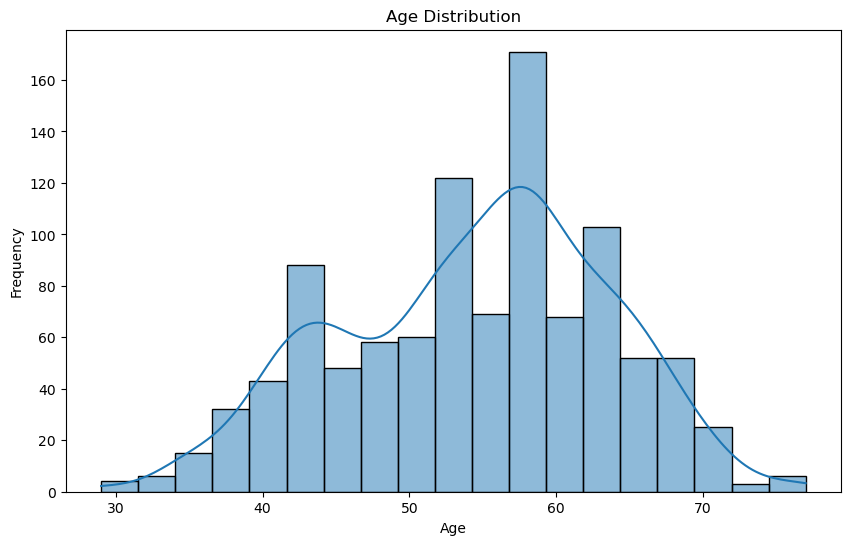

In [105]:
# Create a distribution plot for the age column
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

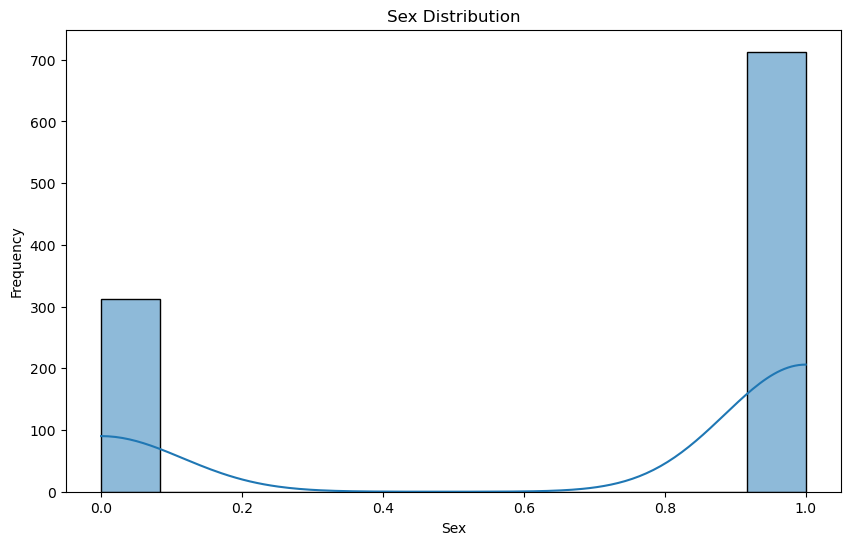

In [106]:
# Create a distribution plot for the sex column
plt.figure(figsize=(10, 6))
sns.histplot(df['sex'], kde=True)
plt.title('Sex Distribution')
plt.xlabel('Sex')
plt.ylabel('Frequency')
plt.show()

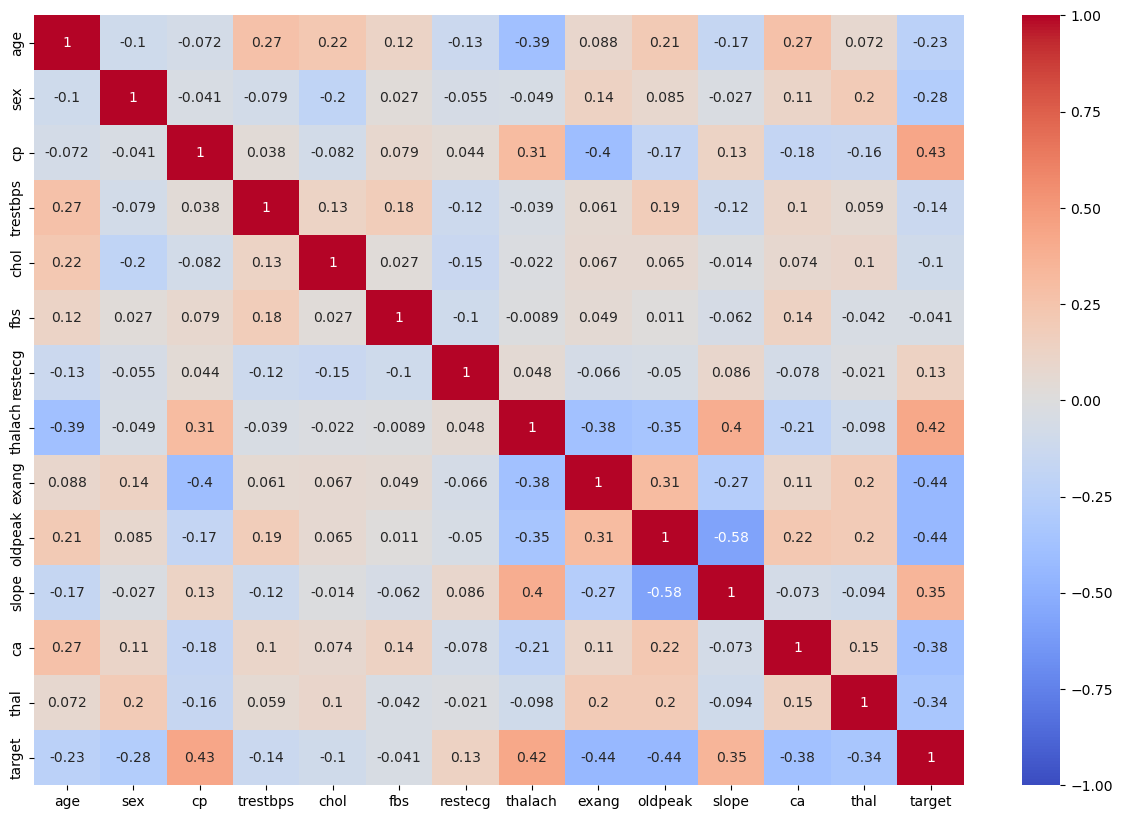

In [107]:
# Correlation heatmap of all numerical columns and target column
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

### Observations:
From the heatmap correlation, it shows chestpain, thalach, and slope columns have a strong positive correlation with the target column.

In [108]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


In [109]:
df.duplicated().sum()
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [110]:
from sklearn.model_selection import train_test_split

X, y = df.drop('target', axis=1), df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Scale-Insensitive

In [129]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier()
forest.fit(X_train, y_train)

RandomForestClassifier()

In [112]:
# from sklearn.naive_bayes import GaussianNB

# nb_clf = GaussianNB()
# nb_clf.fit(X_train, y_train)


In [113]:
# from sklearn.ensemble import GradientBoostingClassifier

# gb_clf = GradientBoostingClassifier()
# gb_clf.fit(X_train, y_train)

### Scale-Sensitive

In [114]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

In [115]:
# from sklearn.neighbors import KNeighborsClassifier

# knn = KNeighborsClassifier()
# knn.fit(X_train_scaled, y_train)

In [116]:
# from sklearn.linear_model import LogisticRegression

# log = LogisticRegression()
# log.fit(X_train_scaled, y_train)

In [117]:
# from sklearn.svm import SVC

# svc = SVC()
# svc.fit(X_train_scaled, y_train)

In [118]:


# forest.score(X_test, y_test)

In [119]:
# nb_clf.score(X_test, y_test)

In [120]:
# gb_clf.score(X_test, y_test)

In [121]:
# knn.score(X_test_scaled, y_test)

In [122]:
# log.score(X_test_scaled, y_test)

In [123]:
# svc.score(X_test_scaled, y_test)

In [124]:
# from sklearn.metrics import recall_score

# y_preds = forest.predict(X_test)
# print('Forest:', recall_score(y_test, y_preds))

# y_preds = nb_clf.predict(X_test)
# print('NB:', recall_score(y_test, y_preds))

# y_preds = gb_clf.predict(X_test)
# print('GB:', recall_score(y_test, y_preds))

# y_preds = knn.predict(X_test_scaled)
# print('Knn:', recall_score(y_test, y_preds))

# y_preds = log.predict(X_test_scaled)
# print('Log:', recall_score(y_test, y_preds))

# y_preds = svc.predict(X_test_scaled)
# print('SVC:', recall_score(y_test, y_preds))

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



 Logistic Regression Performance 
Accuracy: 0.7854
Logistic Regression F1 Score: 0.8035714285714286
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.70      0.76       102
           1       0.74      0.87      0.80       103

    accuracy                           0.79       205
   macro avg       0.79      0.78      0.78       205
weighted avg       0.79      0.79      0.78       205


 KNN Performance 
Accuracy: 0.7317
KNN F1 Score: 0.7342995169082126
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.73      0.73       102
           1       0.73      0.74      0.73       103

    accuracy                           0.73       205
   macro avg       0.73      0.73      0.73       205
weighted avg       0.73      0.73      0.73       205


 SVM Performance 
Accuracy: 0.6829
SVM F1 Score: 0.7058823529411765
Classification Report:
               precision    recall  

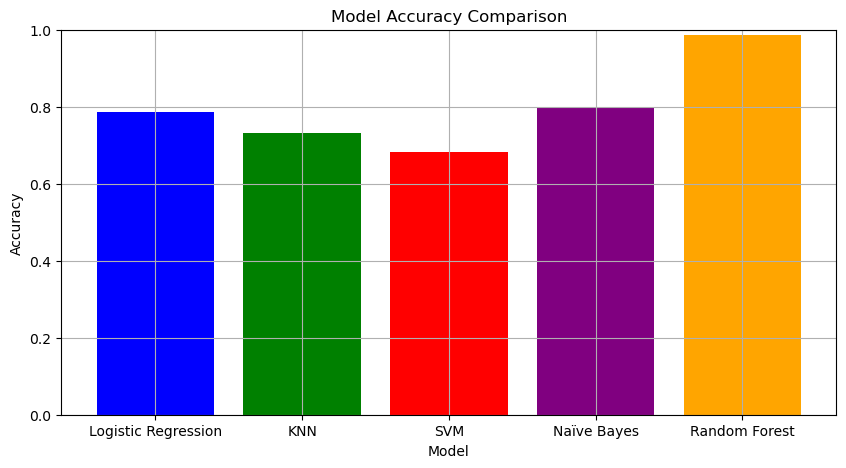

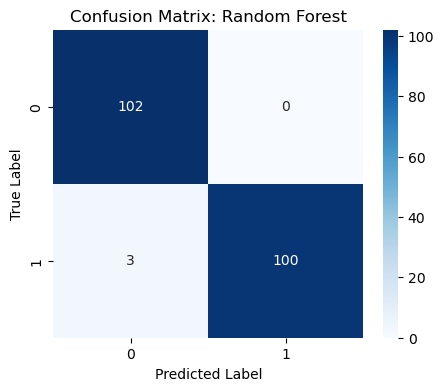

In [ ]:
# Train Logistic Regression Model, KNN Classifier Model, SVM Classifier, Naive Bayes Classifier, Decision Tree Classifier and Random Forest Classifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,  f1_score, ConfusionMatrixDisplay
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(kernel='rbf', probability=True, random_state=42),
    "Naïve Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results[name] = accuracy

    print(f"\n {name} Performance ")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"{name} F1 Score: {f1}")
    print("Classification Report:\n", classification_report(y_test, y_pred))


#Compare Model Performance
plt.figure(figsize=(10, 5))
plt.bar(results.keys(), results.values(), color=['blue', 'green', 'red', 'purple', 'orange', 'black'])
plt.title("Model Accuracy Comparison")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.grid(True)
plt.show()

# Plot Confusion Matrix for Random Forest( since randon forest was the last one in the list Y-test and y_pred are for that model)
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title(f"Confusion Matrix: Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

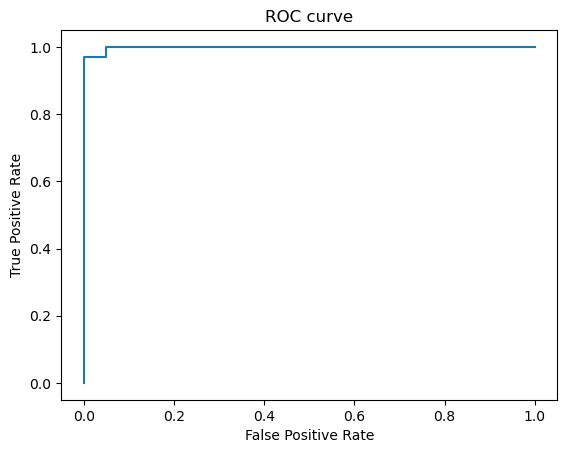

In [126]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

y_probs = forest.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_probs)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

In [127]:
roc_auc_score(y_test, y_probs)

0.9985722444317533

## Hyperparameter Tuning

In [130]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
    
}

forest = RandomForestClassifier(n_jobs=-1, random_state=9)

grid_search = GridSearchCV(forest, param_grid, cv=3, scoring='recall', verbose=2, n_jobs=-1)

In [131]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 324 candidates, totalling 972 fits
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2

GridSearchCV(cv=3, estimator=RandomForestClassifier(n_jobs=-1, random_state=9),
             n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 500]},
             scoring='recall', verbose=2)

In [132]:
best_forest = grid_search.best_estimator_
best_forest

RandomForestClassifier(max_features=None, n_jobs=-1, random_state=9)

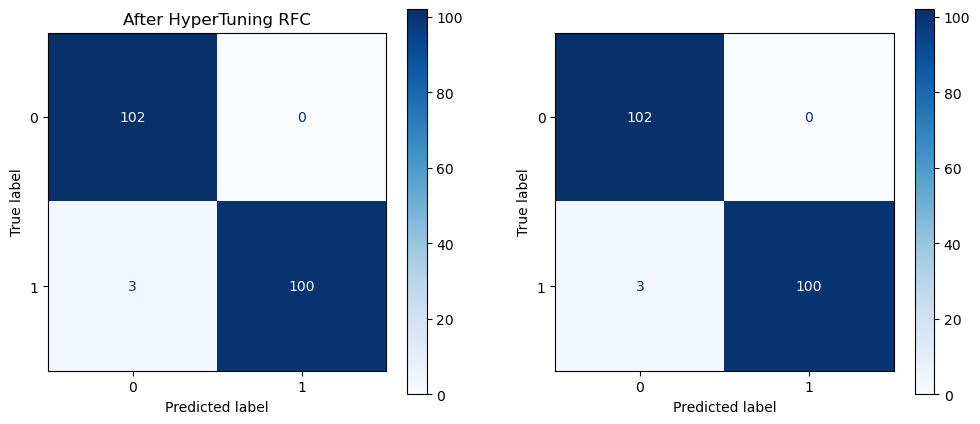

Before HT: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205
 

After HT: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205
 



In [140]:
y_pred_tunned = grid_search.predict(X_test)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
cm1 = confusion_matrix(y_test, y_pred)
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1)
ax1.set_title('Before HyperTuning RFC')
ax1.grid(False)
disp1.plot(cmap=plt.cm.Blues, ax=ax1)

cm2 = confusion_matrix(y_test, y_pred_tunned)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2)
ax1.set_title('After HyperTuning RFC')
ax1.grid(False)
disp2.plot(cmap=plt.cm.Blues, ax=ax2)
plt.show()

print('Before HT: \n', classification_report(y_test, y_pred), '\n')
print('After HT: \n', classification_report(y_test, y_pred_tunned), '\n')

In [ ]:
# Count plot of age, sex against target


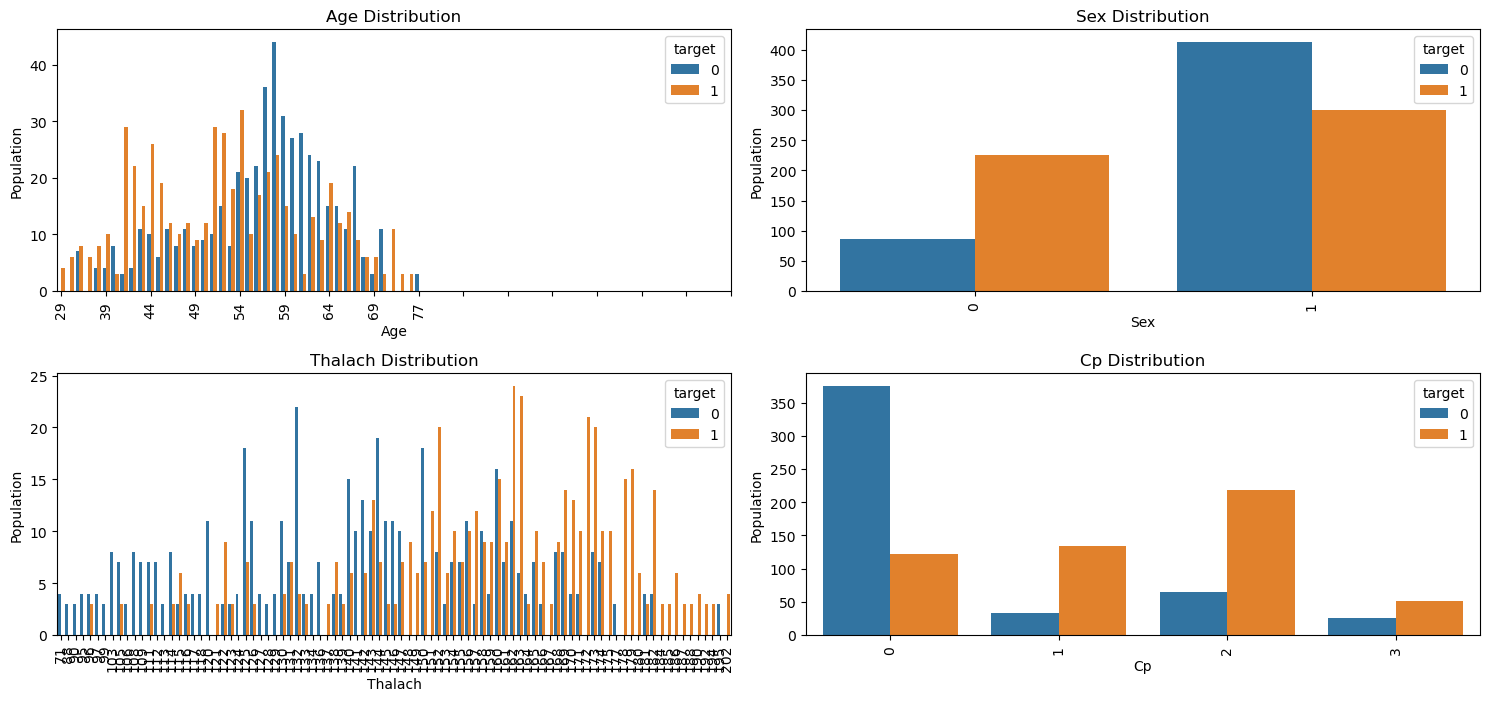

In [155]:
import numpy as np

plt.figure(figsize=(15, 10))
for i, col in enumerate(['age', 'sex', 'thalach', 'cp'], start=1):
    plt.subplot(3, 2, i)
    sns.countplot(x=col, data=df, hue="target", legend=True, order=sorted(df[col].value_counts().index))
    plt.xticks(rotation=90)
    if col == 'age':
        plt.xticks(np.arange(0, df['age'].max() + 1, 5))
    plt.title(f'{col.replace(".", " ").title()} Distribution')
    plt.ylabel('Population')
    plt.xlabel(col.replace(".", " ").title())
    plt.legend(title='target', loc='upper right')
plt.tight_layout()
plt.show()

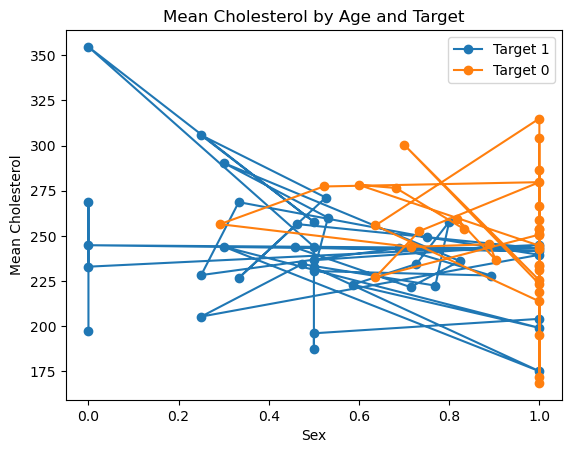

In [ ]:
grouped_df = df.groupby(['age', 'target']).mean().reset_index()
fig, ax = plt.subplots()
for target in grouped_df['target'].unique():
    subset = grouped_df[grouped_df['target'] == target]
    ax.plot(subset['sex'], subset['chol'], marker='o', label=f'Target {target}')
ax.set_xlabel('Age')
ax.set_ylabel('Mean Cholesterol')
ax.set_title('Mean Cholesterol by Age and Target')
ax.legend()
plt.show()

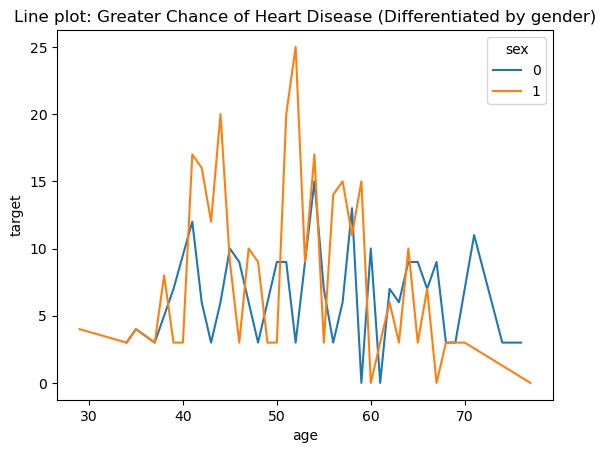

In [145]:
# Line Plot
sns.lineplot(x='age', y='target', data=grouped_data, hue='sex')
plt.title('Line plot: Greater Chance of Heart Disease (Differentiated by gender)')
plt.show()

### Feature Importances

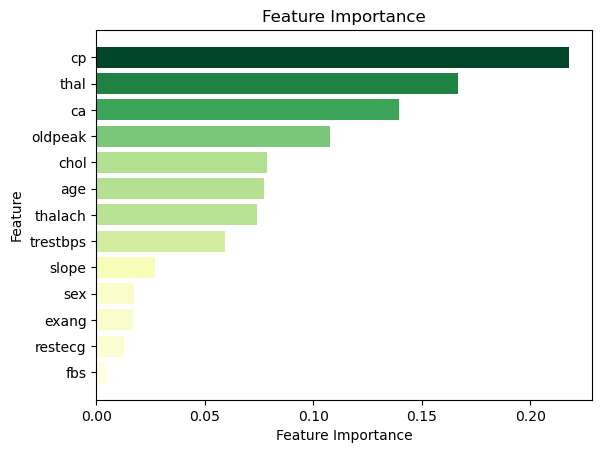

In [133]:
import numpy as np

feature_importances = best_forest.feature_importances_
features = best_forest.feature_names_in_

sorted_idx = np.argsort(feature_importances)
sorted_features = features[sorted_idx]
sorted_importances = feature_importances[sorted_idx]

colors = plt.cm.YlGn(sorted_importances / max(sorted_importances))

plt.barh(sorted_features, sorted_importances, color=colors)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

<Axes: >

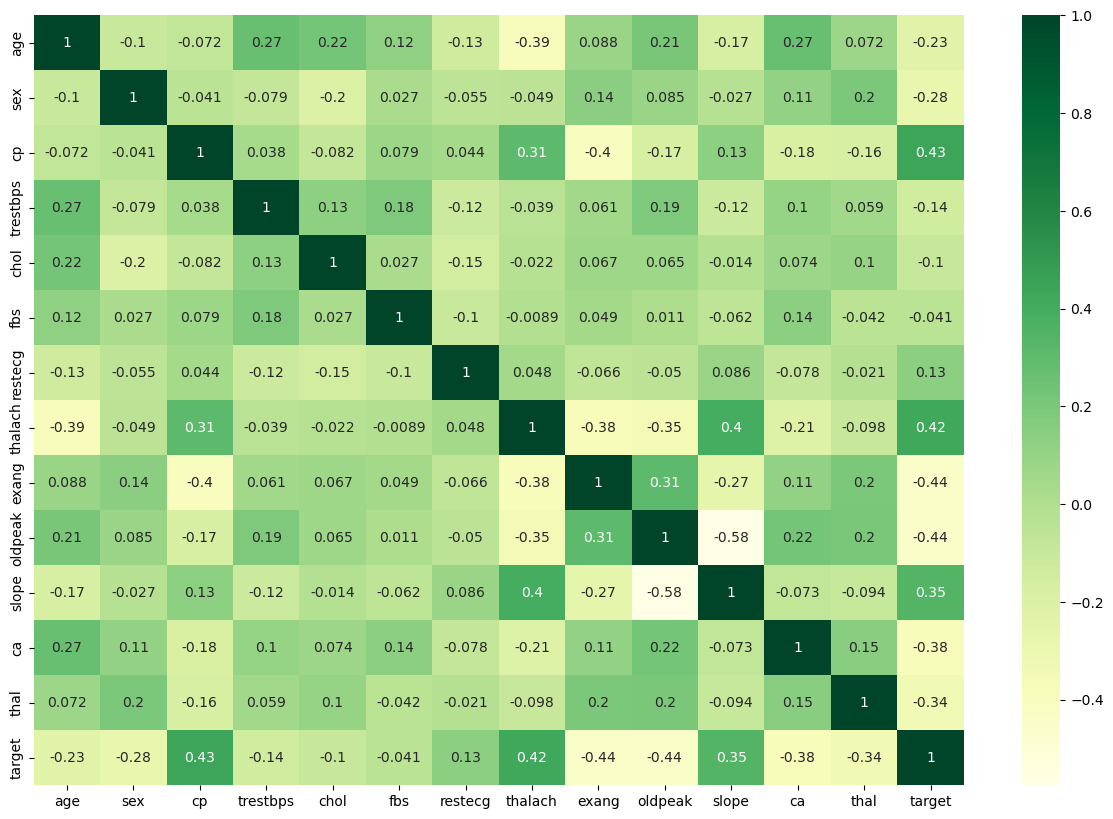

In [139]:
plt.figure(figsize=(15, 10))
sns.heatmap((df.corr()), annot=True, cmap='YlGn')